In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../../005_src/') #use relative path
os.chdir("../../005_src")

from config import *


----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Custom loss imported
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
this_date = "20210730"
ts = "19h18m45s"
GCN_num = "017"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

from _03_Networks.GCN_017.GCN_model_017 import *
from _03_Networks.GCN_017.GCN_trainer_017 import *
from _03_Networks.GCN_017.GCN_parameters_017 import *
from _03_Networks.GCN_017.Custom_losses import *
this_GCN, ts_import = check_import()

GCN_017
at 20h54m18s imported models:
['HL03_bn']
imported parameters from: GCN_parameters_017.py at 20h54m18s
imported trainer: GCN_017 at 20h54m18s


## Reload dictionary

In [4]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210730-19h18m45s/


In [5]:
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

{'input_file_name': '20210710-11h46m35s_timesteps200_ec3500_em7000',
 'max_num_veh': 10,
 'sim_duration_timesteps': '200',
 'train_size': 0.8,
 'batch_size': 1,
 'Nepochs': 5000,
 'run_date': '20210730-',
 'run_time': '19h18m45s',
 'model': 'GCN_017',
 'combo': ('mean',
  1,
  'Adam',
  'MSE',
  [256, 512, 256],
  0.01,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  False,
  'relu'),
 'random_seed': 42657,
 'save_every': 250,
 'transformstat': False,
 'plotstat': True,
 'printstat': False,
 'intentionstat': 'obsoleted',
 'use_edges_attr': False,
 'activation_function': 'relu',
 'shuttle_train_frame': None,
 'shuttle_val_frame': None,
 'num_rows_training': 113,
 'num_rows_validation': 26,
 'num_rows_test': 3,
 'exclude_yaw': 'obsoleted',
 'concatenatestat': 'obsoleted',
 'paddingstat': 'obsoleted',
 'size_input': 6,
 'size_output': 2,
 'model_architecture': HL03_bn(
   (actfun): ReLU()
   (conv1): GraphConv(6, 256)
   (conv2): GraphConv(256, 512)
   (conv3): GraphConv(512, 256)
   (conv

In [6]:
input_file_name = reloaded_dict["input_file_name"]
reloaded_dict["model_architecture"]

HL03_bn(
  (actfun): ReLU()
  (conv1): GraphConv(6, 256)
  (conv2): GraphConv(256, 512)
  (conv3): GraphConv(512, 256)
  (conv4): GraphConv(256, 2)
  (bn1): GraphNorm(256)
  (bn2): GraphNorm(512)
  (bn3): GraphNorm(256)
)

## Plot losses

In [7]:
# first lossess paths

curr_epoch = 500
tot_epoch = 5000
type_epoch = "TEMP"



In [8]:
# load losses

if type_epoch == "TEMP":
    load_path_files = os.path.join(MODEL_OUTPUT_PATH_TODAY,f"{this_date}-{ts}EPOCH_{curr_epoch}of{tot_epoch}_{type_epoch}__{type_epoch}__")
    t_0_5000_path =  f"{load_path_files}training_loss.pkl"
    v_0_5000_path =  f"{load_path_files}validation_loss.pkl"
    lr_0_5000_path = f"{load_path_files}learning_rate.pkl"
    t_losses_load = pkl.load(open(t_0_5000_path, 'rb'))
    v_losses_load = pkl.load(open(v_0_5000_path, 'rb'))
    lr_load = pkl.load(open(lr_0_5000_path, 'rb'))
else: 
  # load losses
    t_losses_load.extend(pkl.load(open( reloaded_dict['train_losses_path'], 'rb')))
    v_losses_load.extend(pkl.load(open( reloaded_dict['val_losses_path'], 'rb')))
    lr_load.extend(pkl.load(open( reloaded_dict['lr_path'], 'rb')))  

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210730-19h18m45s/20210730-19h18m45s_train_val_loss_plot.png


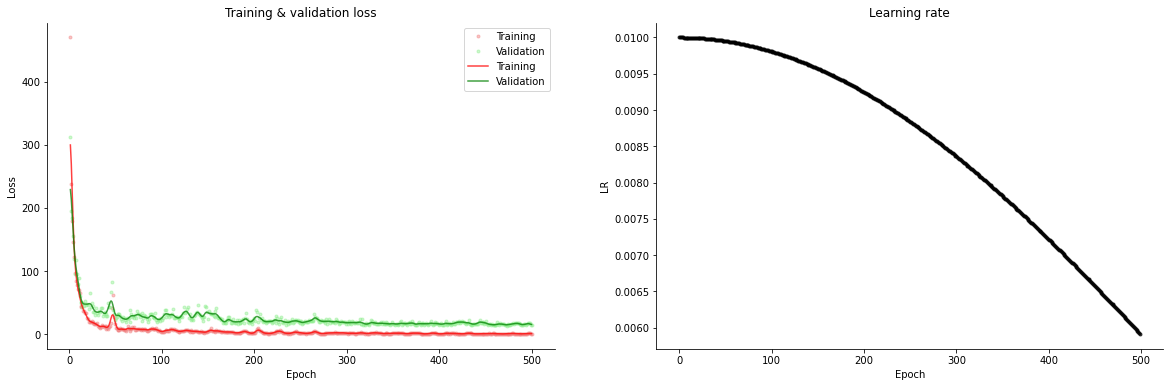

In [9]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = lr_load,
                  gaussian=True,
                  sigma=2,
                  figsize=(20, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [10]:
hidden_layers_sizes = reloaded_dict["hidden_layers_sizes"]
size_input = reloaded_dict['size_input']
size_output = reloaded_dict['size_output']
random_seed = reloaded_dict["random_seed"]
activation_fun = reloaded_dict["activation_function"]

In [11]:
##================================
## MODEL INIT
##================================
num_hidden_layers = len(hidden_layers_sizes)
    
#print (printstat)
#pdb.set_trace()
if num_hidden_layers == 3:

            hc_1 = hidden_layers_sizes[0]
            hc_2 = hidden_layers_sizes[1]
            hc_3 = hidden_layers_sizes[2]

            model = HL03_bn(
                                num_input_features=size_input,
                                num_output_features =size_output,
                                random_seed = random_seed,
                                hc_1 = hc_1,
                                hc_2 = hc_2,
                                hc_3 = hc_3,
                                activation_function = activation_fun,
                                layer_type = layer_type,
                                normalization = normalization,
                                printstat = printstat,                
                                )
load_model = model

In [12]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

HL03_bn(
  (actfun): ReLU()
  (conv1): GraphConv(6, 256)
  (conv2): GraphConv(256, 512)
  (conv3): GraphConv(512, 256)
  (conv4): GraphConv(256, 2)
  (bn1): GraphNorm(256)
  (bn2): GraphNorm(512)
  (bn3): GraphNorm(256)
)

In [13]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'{input_file_name}_dataset*',
                                     recursive=True))
if len( datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        print (*datasets_list, sep = "\n")
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )

In [14]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_validation_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00,  6.27it/s]

found 5 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210730-19h18m45s/figures_validation_set/
the gif will be create using the first 5 images


4it [00:02,  1.73it/s]

Could not find a format to read the specified file in single-image mode


5it [00:02,  1.98it/s]


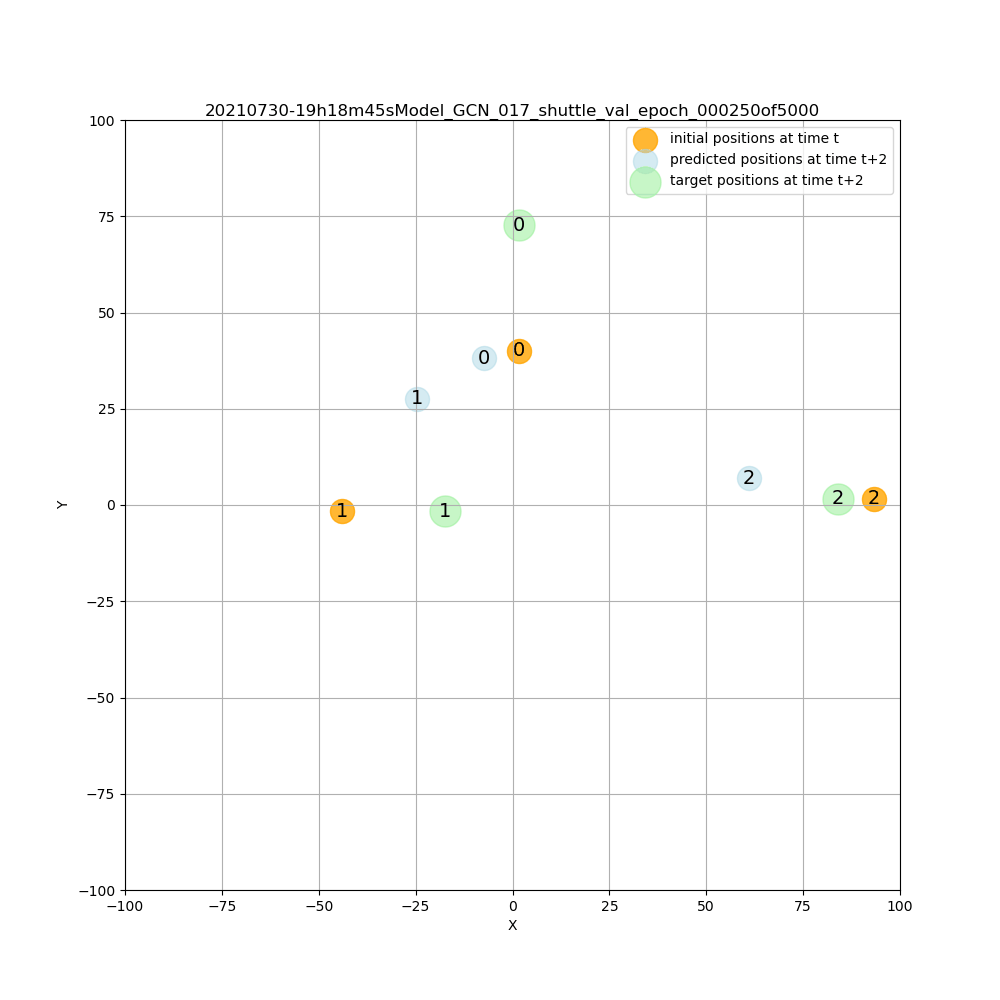

In [15]:
Image(open(f'{path_GIF}','rb').read())

In [16]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_training_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

2it [00:00, 11.39it/s]

found 5 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210730-19h18m45s/figures_training_set/
the gif will be create using the first 5 images
Could not find a format to read the specified file in single-image mode


5it [00:00, 11.00it/s]


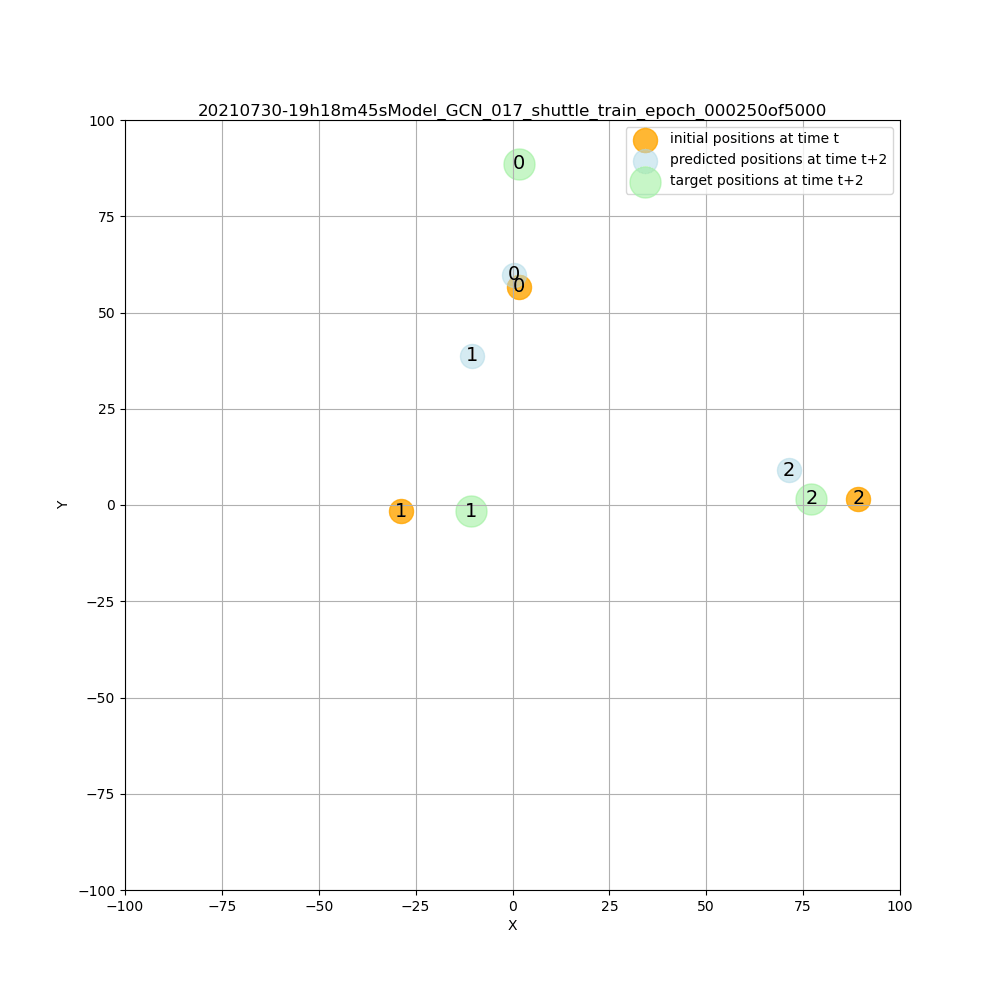

In [17]:
Image(open(f'{path_GIF}','rb').read())

In [18]:
#deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)

## try with many different images... any difference? 

In [19]:
MODEL_OUTPUT_PATH

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/'

In [20]:
dateset_train_path = f"{MODEL_OUTPUT_PATH}DATASETS/df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc__dataset_01_train.pt"
dateset_train = torch.load(f'{dateset_train_path}')

In [21]:
dateset_train

[Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 2]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 2]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 2]),
 Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 2]),
 Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 2]),
 Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 2]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 2]),
 Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 2]),
 Data(edge_attr=[15], edge_index=[2, 15], x=[6, 6], y=[6, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 6], y=[5, 2]),
 Data(edge_attr=[1

In [22]:
len(dateset_train)

9144

In [23]:
device

device(type='cuda', index=0)

In [24]:
losses = losses_results_model(
                       load_model, 
                       dateset_train,
                       device = "cpu",
                       start_from = 0,
                       end_at = len(dateset_train),
                       edges_attr = True,
        
                       printstat = False,       
                       loss_stat = "L1"
                      )
print (min(losses))
print (max(losses))
print (mean(losses))

1.136884093284607
75.48133850097656
21.562418739522432


In [25]:
min_ind = losses.index(min(losses))
max_ind = losses.index(max(losses))


4803

 INPUT
x=tensor([[ -1.6000,  83.2100,   3.1416,   5.5500,   2.0000,   0.0000],
        [  1.6000, -94.9000,   0.0000,   0.0000,   1.0000,   0.0000]]),
edge_index=tensor([[0],
        [1]]),
edge_attr=tensor([1.4000])


 TARGET
tensor([[ -1.6000,  66.7800],
        [  1.6000, -88.4000]])

 PREDICTION
tensor([[  0.6299,  66.4496],
        [  2.6378, -89.3495]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[ -1.6000,  83.2100,   3.1416,   5.5500,   2.0000,   0.0000],
        [  1.6000, -94.9000,   0.0000,   0.0000,   1.0000,   0.0000]]),
edge_index=tensor([[0],
        [1]]),
edge_attr=tensor([1.4000])


 TARGET
tensor([[ -1.6000,  66.7800],
        [  1.6000, -88.4000]])

 PREDICTION
tensor([[  0.6299,  66.4496],
        [  2.6378, -89.3495]], grad_fn=<AddBackward0>)
loss_value=1.136884093284607
loss_value=1.136884093284607


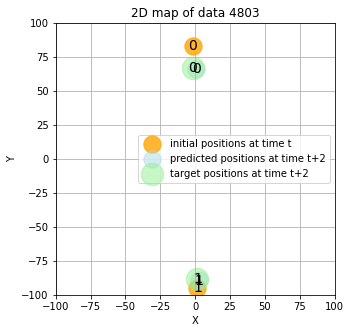

In [26]:
space = 100
loss = plot_results_model(
                       load_model, 
                       dateset_train,
                       start_from = min_ind,
                       end_at = min_ind+1,
                       edges_attr = True,
                       figsize = (5,5),
                       plot_input = True,
                       plot_target = True,
                       plot_prediction = True,
                       plot_intention = False, 
                       title = None,
        
                       printstat = True,       

                       xlim = (-space,space),
                       ylim = (-space,space),
                       loss_stat = "L1"
                      )


8493

 INPUT
x=tensor([[  1.6000,   8.3600,   6.0661,   5.2300,   3.0000,   0.0000],
        [  1.6000,  -4.4200,   0.0000,   1.7100,   1.0000,   0.0000],
        [  1.6000, -13.6300,   0.0000,   0.0000,   3.0000,   0.0000],
        [ -1.6000, -10.0400,   3.0802,   6.3500,   3.0000,   0.0000],
        [-10.4500,  -1.6000,   1.5708,   3.4000,   0.0000,   0.0000],
        [  1.6000, -22.1600,   0.0000,   1.0400,   1.0000,   0.0000],
        [-21.5100,  -1.6000,   1.5708,   1.6900,   1.0000,   0.0000],
        [ 10.8700,   1.6000,   4.7124,   3.1900,   3.0000,   0.0000],
        [  1.6000, -30.7000,   0.0000,   0.0000,   3.0000,   0.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   0.0000]]),
edge_index=tensor([[0, 0, 5, 0, 5, 2, 4, 0, 3, 1, 0, 3, 1, 0, 5, 4, 2, 1, 0, 4, 2, 1, 3, 6,
         6, 1, 5, 2, 1, 3, 7, 1, 2, 6, 0, 0, 2, 4, 3, 1, 8, 7, 2, 4, 3],
        [9, 2, 8, 1, 7, 5, 9, 3, 6, 8, 4, 5, 7, 6, 9, 6, 8, 9, 5, 5, 7, 2, 8, 8,
         7, 3, 6, 9, 4, 7, 8, 6, 3, 

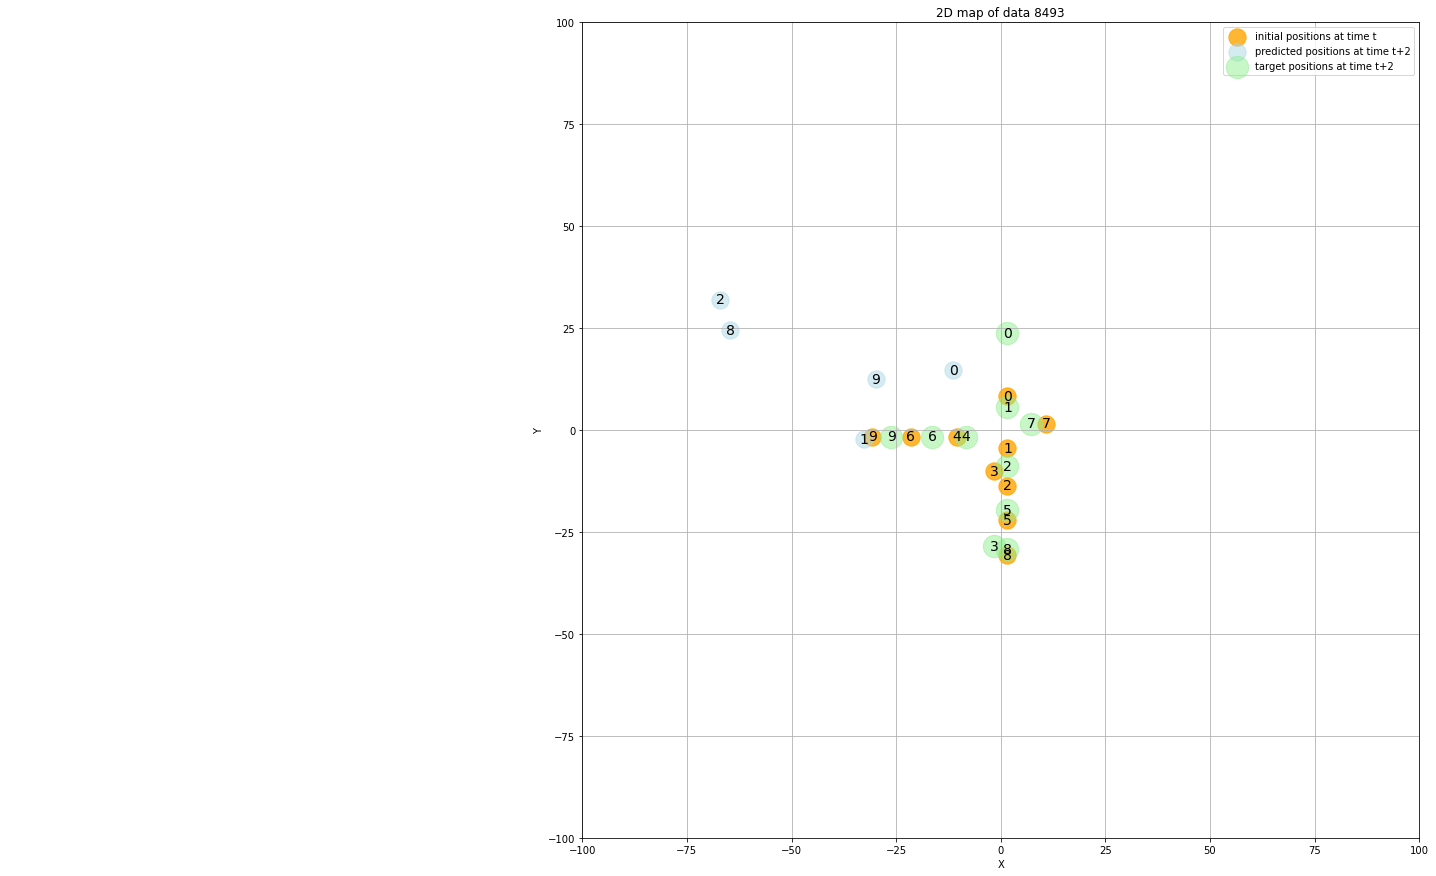

In [28]:
space = 100
loss = plot_results_model(
                       load_model, 
                       dateset_train,
                       start_from = max_ind,
                       end_at = max_ind+1,
                       edges_attr = True,
                       figsize = (15,15),
                       plot_input = True,
                       plot_target = True,
                       plot_prediction = True,
                       plot_intention = False, 
                       title = None,
        
                       printstat = True,       

                       xlim = (-space,space),
                       ylim = (-space,space),
                       loss_stat = "L1"
                      )